## Function which load all data from all directories and finaly return data to learning and results to prediction.

In [4]:
import numpy as np
import os

def import_data(directory: str) -> None:
    """Load all data to learning from specific directory

    Args:
        directory (str): directory where all data are stored

    Returns:
        np.array: data from simulations in readable form shape (100,100,3) where we have 100 simulations, 100 requests and 3 features (input node, output node, bitrate
        np.array: labels to predictions from simulation in readable form with shape (100,4) where we have 100 simulations and 4 data to predictions (highestSlot, avgHighestSlot, sumOfSlots, avgActiveTransceivers)
    """ 

    data = []
    results = []

    for i in os.listdir(directory):
        d = np.genfromtxt(f"{directory}/{i}/requests.csv", delimiter=',', skip_header=1, dtype=float)
        data.append(d[:, 1:])
        results.append(np.genfromtxt(f"{directory}/{i}/results.txt", dtype=float, usecols=(1,)))

    return np.array(data), np.array(results)

## Load data and reshape them and choose one label to prediction

In [5]:
data, results = import_data("Euro28")
data = data.reshape(100,300)
results = results[:, 1]

#print(data.shape)

## Learning and visualization without any preprocessing

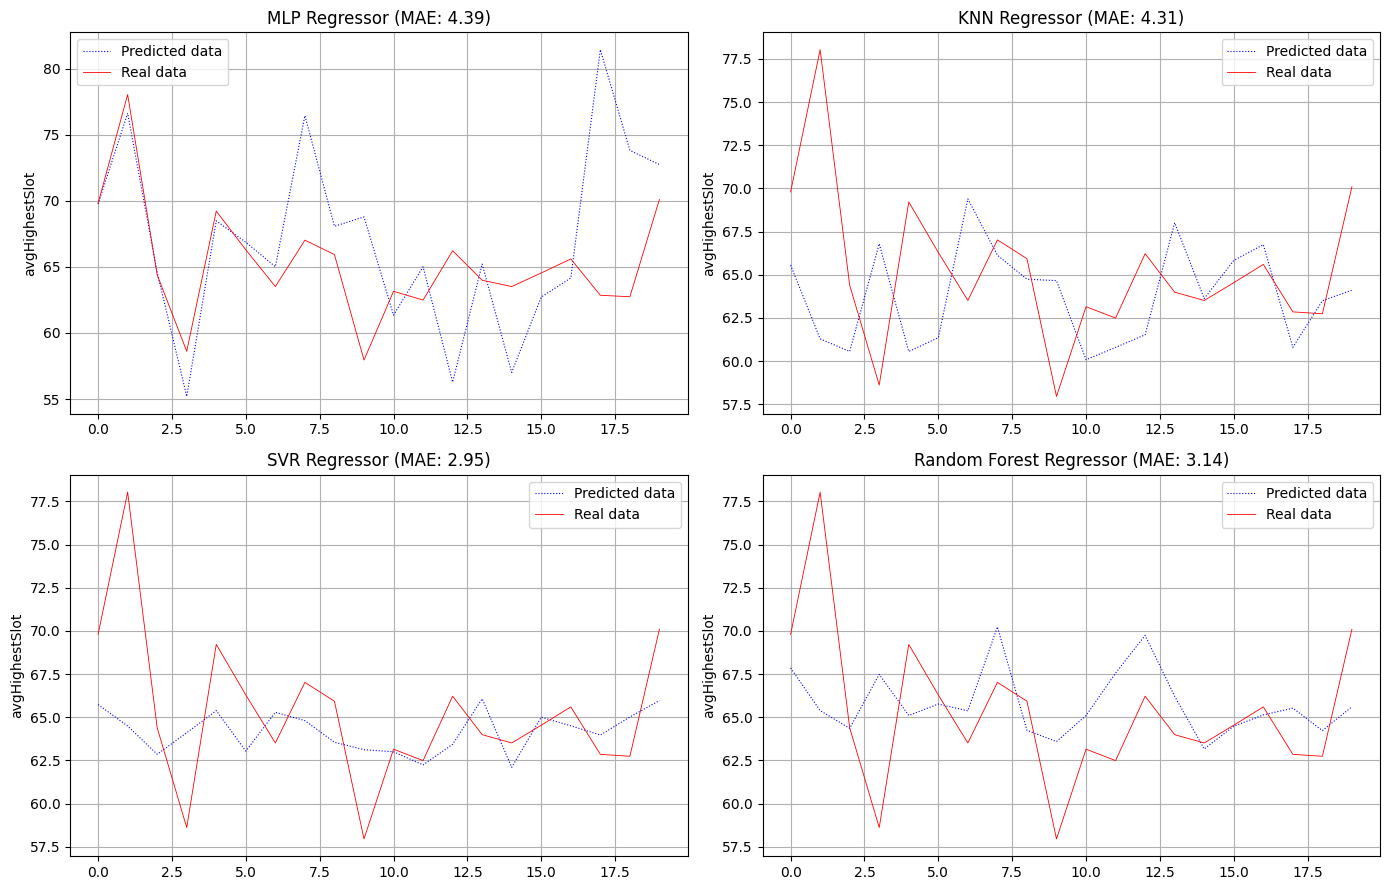

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(data, results, test_size=0.2, random_state=1410)

# MLP
mlp = MLPRegressor(hidden_layer_sizes=5, batch_size=10, random_state=1410, warm_start=True)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

# KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# SVR
svr = SVR(kernel="poly")
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# RFR
rfr = RandomForestRegressor(random_state=1410)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

# Show results
fig, ax = plt.subplots(2, 2, figsize=(14,9))

# MLP
ax[0,0].plot(y_pred_mlp, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,0].set_ylabel("avgHighestSlot")
ax[0,0].set_title(f"MLP Regressor (MAE: {round(mae_mlp, 2)})")
ax[0,0].legend()
ax[0,0].grid()

# KNN
ax[0,1].plot(y_pred_knn, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,1].set_ylabel("avgHighestSlot")
ax[0,1].set_title(f"KNN Regressor (MAE: {round(mae_knn, 2)})")
ax[0,1].legend()
ax[0,1].grid()

# SVR
ax[1,0].plot(y_pred_svr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,0].set_ylabel("avgHighestSlot")
ax[1,0].set_title(f"SVR Regressor (MAE: {round(mae_svr, 2)})")
ax[1,0].legend()
ax[1,0].grid()

# Random Forest Regressor
ax[1,1].plot(y_pred_rfr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,1].set_ylabel("avgHighestSlot")
ax[1,1].set_title(f"Random Forest Regressor (MAE: {round(mae_rfr, 2)})")
ax[1,1].legend()
ax[1,1].grid()

plt.tight_layout()
plt.show()

## Learning and visualization with MinMaxScaler

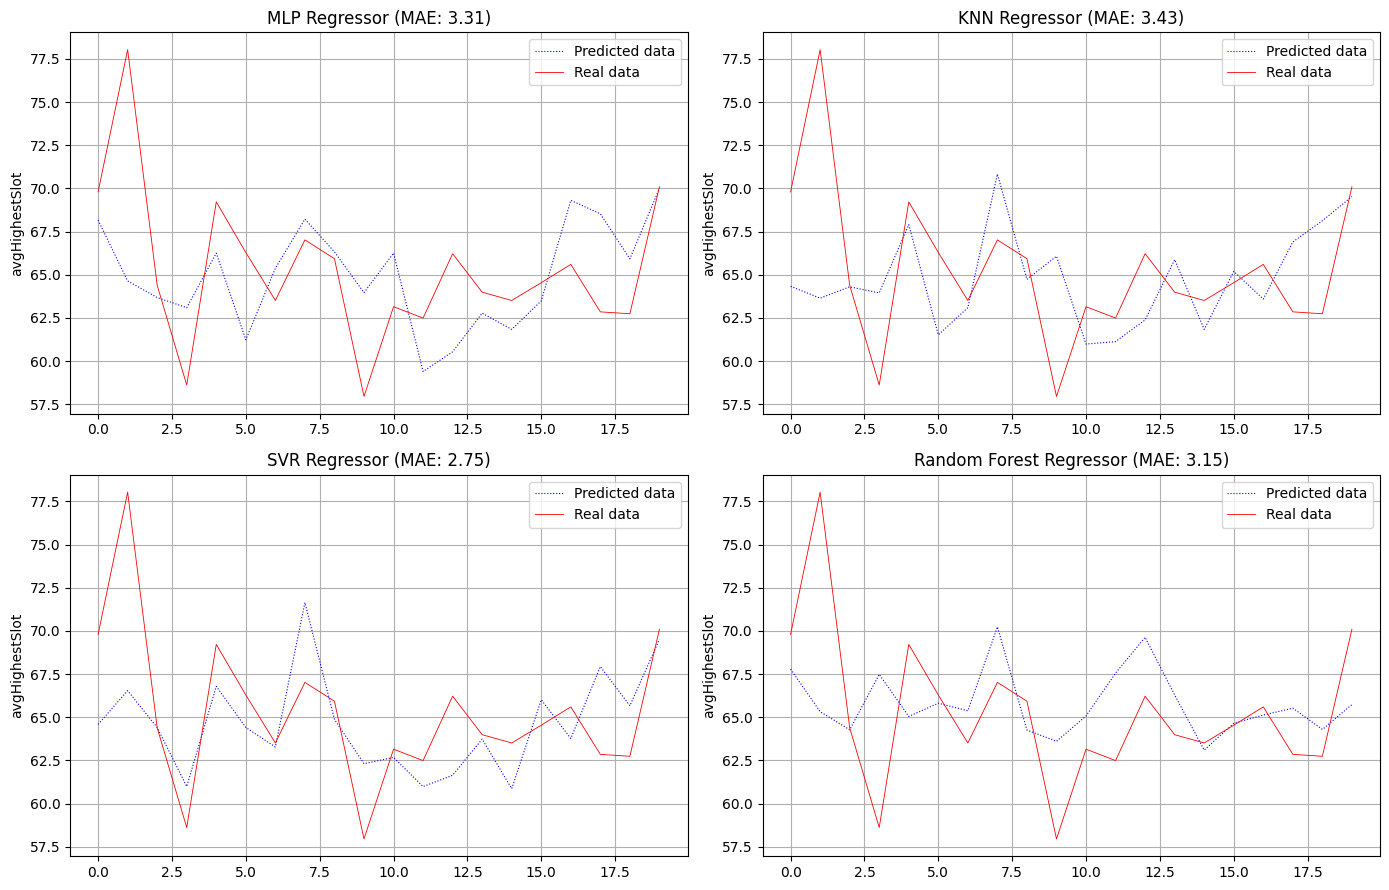

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

# Load data
data, results = import_data("Euro28")
data = data.reshape(100,300)
results = results[:, 1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(data, results, test_size=0.2, random_state=1410)

mms = MinMaxScaler()
mms.fit(X_train, y_train)

X_train = mms.transform(X_train)
X_test = mms.transform(X_test)


# MLP
mlp = MLPRegressor(hidden_layer_sizes=5, batch_size=10, random_state=1410, warm_start=True)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

# KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# SVR
svr = SVR(kernel="poly")
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# RFR
rfr = RandomForestRegressor(random_state=1410)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

# Show results
fig, ax = plt.subplots(2, 2, figsize=(14,9))

# MLP
ax[0,0].plot(y_pred_mlp, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,0].set_ylabel("avgHighestSlot")
ax[0,0].set_title(f"MLP Regressor (MAE: {round(mae_mlp, 2)})")
ax[0,0].legend()
ax[0,0].grid()

# KNN
ax[0,1].plot(y_pred_knn, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,1].set_ylabel("avgHighestSlot")
ax[0,1].set_title(f"KNN Regressor (MAE: {round(mae_knn, 2)})")
ax[0,1].legend()
ax[0,1].grid()

# SVR
ax[1,0].plot(y_pred_svr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,0].set_ylabel("avgHighestSlot")
ax[1,0].set_title(f"SVR Regressor (MAE: {round(mae_svr, 2)})")
ax[1,0].legend()
ax[1,0].grid()

# Random Forest Regressor
ax[1,1].plot(y_pred_rfr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,1].set_ylabel("avgHighestSlot")
ax[1,1].set_title(f"Random Forest Regressor (MAE: {round(mae_rfr, 2)})")
ax[1,1].legend()
ax[1,1].grid()

plt.tight_layout()
plt.show()

# Add PCA before learning

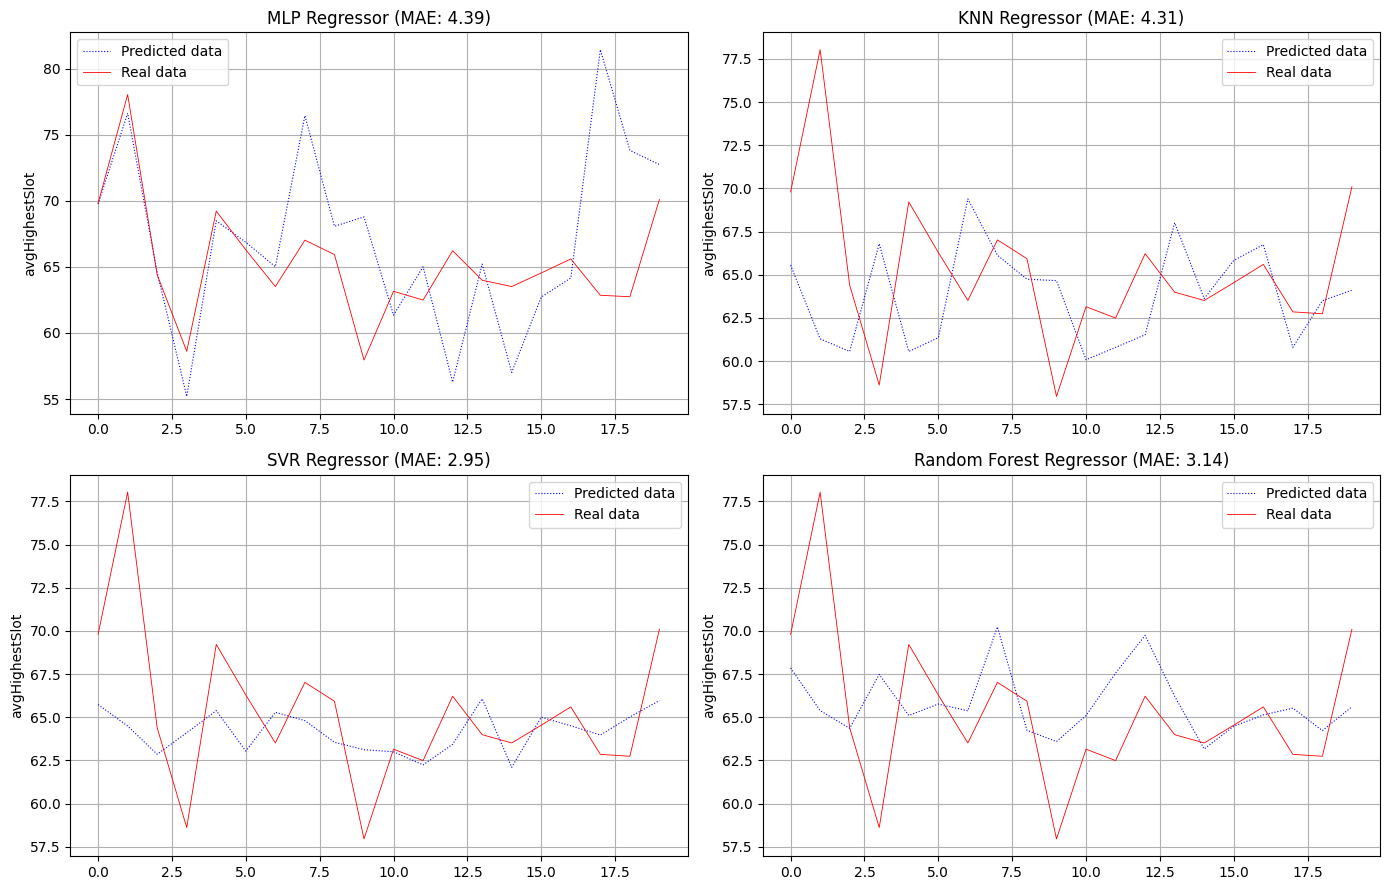

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

# Load data
data, results = import_data("Euro28")
data = data.reshape(100,300)
results = results[:, 1]

mms = MinMaxScaler()
mms.fit(X_train, y_train)

X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

pca = PCA()
pca.fit(X_train, y_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Split data
X_train, X_test, y_train, y_test = train_test_split(data, results, test_size=0.2, random_state=1410)



# MLP
mlp = MLPRegressor(hidden_layer_sizes=5, batch_size=10, random_state=1410, warm_start=True)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

# KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# SVR
svr = SVR(kernel="poly")
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# RFR
rfr = RandomForestRegressor(random_state=1410)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

# Show results
fig, ax = plt.subplots(2, 2, figsize=(14,9))

# MLP
ax[0,0].plot(y_pred_mlp, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,0].set_ylabel("avgHighestSlot")
ax[0,0].set_title(f"MLP Regressor (MAE: {round(mae_mlp, 2)})")
ax[0,0].legend()
ax[0,0].grid()

# KNN
ax[0,1].plot(y_pred_knn, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,1].set_ylabel("avgHighestSlot")
ax[0,1].set_title(f"KNN Regressor (MAE: {round(mae_knn, 2)})")
ax[0,1].legend()
ax[0,1].grid()

# SVR
ax[1,0].plot(y_pred_svr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,0].set_ylabel("avgHighestSlot")
ax[1,0].set_title(f"SVR Regressor (MAE: {round(mae_svr, 2)})")
ax[1,0].legend()
ax[1,0].grid()

# Random Forest Regressor
ax[1,1].plot(y_pred_rfr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,1].set_ylabel("avgHighestSlot")
ax[1,1].set_title(f"Random Forest Regressor (MAE: {round(mae_rfr, 2)})")
ax[1,1].legend()
ax[1,1].grid()

plt.tight_layout()
plt.show()